In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

In [2]:
# ## try lager bottle neck

# # 1. load data

# df = pd.read_csv('./LID_results/data_ID_results_moredata.csv')
# df = df.dropna()
# # sort by DM method
# df = df.sort_values(by=['DM method'])
# df

FileNotFoundError: [Errno 2] No such file or directory: './LID_results/data_ID_bigneck_real_PCA.csv'

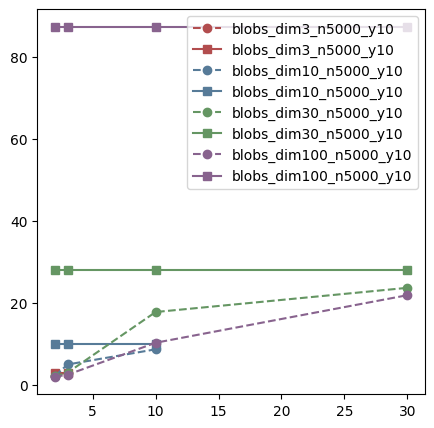

In [11]:
# fig, ax = plt.subplots(figsize=(5, 5))
# colors = sns.color_palette("Set1", n_colors=8, desat=.5)
# for i, dataset in enumerate(df['Dataset'].unique()):
#     curdf = df[df['Dataset'] == dataset]
#     # sort by bottleneck dim
#     curdf = curdf.sort_values(by=['bottleneck_dim'])
#     ax.plot(curdf['bottleneck_dim'], curdf['Intrinsic Dim (reconstructed)'], '--o', label=dataset, color=colors[i])
#     ax.plot(curdf['bottleneck_dim'], curdf['Intrinsic Dim (data)'], '-s', label=dataset, color=colors[i])
# ax.legend()

In [3]:
df = pd.read_csv('./LID_results_new_grid500/data_ID_bigneck_real_PCA.csv')
# df = df.dropna()
# sort by DM method
# df = df.sort_values(by=['DM method'])
df

,Dataset,DM method,Dim,n_sample,n_cluster,Intrinsic Dim (reconstructed),Intrinsic Dim (data),Esimated ID (reco),Esimated ID (data),bottleneck_dim
0,mnist,DBM_PCA_2,784,5000,10,NaN,NaN,3.0374,48.1428,2.0
1,mnist,DBM_PCA_5,784,5000,10,NaN,NaN,17.1718,48.1428,5.0
2,mnist,DBM_PCA_10,784,5000,10,NaN,NaN,32.5414,48.1428,10.0
3,mnist,DBM_PCA_15,784,5000,10,NaN,NaN,38.5240,48.1428,15.0
4,mnist,DBM_PCA_20,784,5000,10,NaN,NaN,40.1398,48.1428,20.0
5,har,DBM_PCA_2,561,5000,6,NaN,NaN,2.6054,49.5890,2.0
6,har,DBM_PCA_5,561,5000,6,NaN,NaN,4.3744,49.5890,5.0
7,har,DBM_PCA_10,561,5000,6,NaN,NaN,5.4360,49.5890,10.0
8,har,DBM_PCA_15,561,5000,6,NaN,NaN,5.5982,49.5890,15.0
9,har,DBM_PCA_20,561,5000,6,NaN,NaN,5.4412,49.5890,20.0


In [10]:
from LID import ID_finder_T 
mode = 'VR'
threshold = 0.95

root = './LID_results_new_grid500/'
for data_name in df['Dataset'].unique():
    data = np.load(root + data_name + '_data_eigen.npz')
    data_eigen = data['data_eigen']
    data_id = ID_finder_T.process_results(data_eigen,threshold=threshold, mode=mode).to('cpu').numpy()
    df.loc[df['Dataset'] == data_name, 'Intrinsic Dim (data) ' + mode] = data_id.mean()
    subdf = df[df['Dataset'] == data_name]
    for dm_method in subdf['DM method'].unique():
        # curdf = subdf.loc[subdf['DM method'] == dm_method]
        reco_eigen = np.load(root + data_name + '_' + dm_method + '_recon_eigen.npz')['reco_eigen']
        # print(reco_eigen.shape)
        reco_id = ID_finder_T.process_results(reco_eigen,threshold=threshold, mode=mode).to('cpu').numpy()
        df.loc[(df['Dataset'] == data_name) & (df['DM method'] == dm_method), 'Intrinsic Dim (reconstructed) ' + mode] = reco_id.mean()

    
df

,Dataset,DM method,Dim,n_sample,n_cluster,Intrinsic Dim (reconstructed),Intrinsic Dim (data),Esimated ID (reco),Esimated ID (data),bottleneck_dim,Intrinsic Dim (data) TV,Intrinsic Dim (reconstructed) TV,Intrinsic Dim (data) VR,Intrinsic Dim (reconstructed) VR
0,mnist,DBM_PCA_2,784,5000,10,NaN,NaN,3.0374,48.1428,2.0,48.1428,3.0374,24.5696,2.9276
1,mnist,DBM_PCA_5,784,5000,10,NaN,NaN,17.1718,48.1428,5.0,48.1428,17.1718,24.5696,9.9694
2,mnist,DBM_PCA_10,784,5000,10,NaN,NaN,32.5414,48.1428,10.0,48.1428,32.5414,24.5696,16.3138
3,mnist,DBM_PCA_15,784,5000,10,NaN,NaN,38.5240,48.1428,15.0,48.1428,38.5240,24.5696,19.5720
4,mnist,DBM_PCA_20,784,5000,10,NaN,NaN,40.1398,48.1428,20.0,48.1428,40.1398,24.5696,20.8812
5,har,DBM_PCA_2,561,5000,6,NaN,NaN,2.6054,49.5890,2.0,49.5890,2.6054,32.2610,2.6534
6,har,DBM_PCA_5,561,5000,6,NaN,NaN,4.3744,49.5890,5.0,49.5890,4.3744,32.2610,4.2428
7,har,DBM_PCA_10,561,5000,6,NaN,NaN,5.4360,49.5890,10.0,49.5890,5.4360,32.2610,4.9718
8,har,DBM_PCA_15,561,5000,6,NaN,NaN,5.5982,49.5890,15.0,49.5890,5.5982,32.2610,5.1140
9,har,DBM_PCA_20,561,5000,6,NaN,NaN,5.4412,49.5890,20.0,49.5890,5.4412,32.2610,5.0516


[48.1428 48.1428 48.1428 48.1428 48.1428]
[49.589 49.589 49.589 49.589 49.589]


/tmp/ipykernel_33685/842714541.py:9: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax2.get_shared_y_axes().join(ax2, ax1)


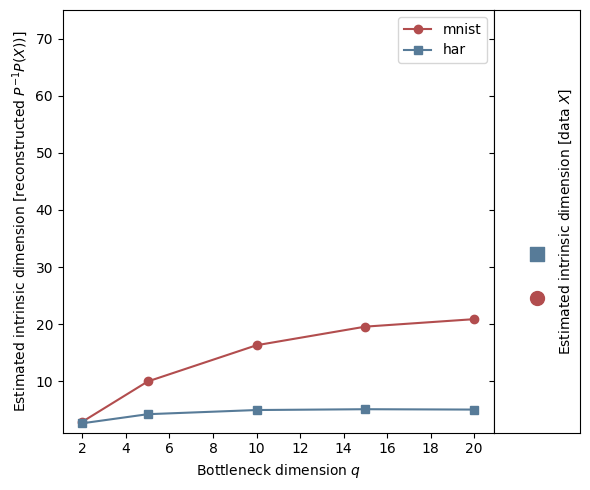

In [11]:
fig = plt.figure(figsize=(6, 5))
gs0 = gridspec.GridSpec(1, 1, figure=fig)

gs00 = gridspec.GridSpecFromSubplotSpec(1, 6, subplot_spec=gs0[0])

ax1 = fig.add_subplot(gs00[0, :-1])
ax2 = fig.add_subplot(gs00[0, -1])
# link the y-axis of ax2 to ax1
ax2.get_shared_y_axes().join(ax2, ax1)
# ax2.set_yticks([])

colors = sns.color_palette("Set1", n_colors=8, desat=.5)
markers = ['o', 's', 'v', 'D', 'X', 'P', 'd', 'h']
for i, dataset in enumerate(df['Dataset'].unique()):
    curdf = df[df['Dataset'] == dataset]
    # sort by bottleneck dim
    curdf = curdf.sort_values(by=['bottleneck_dim'])
    ax1.plot(curdf['bottleneck_dim'], curdf['Intrinsic Dim (reconstructed) VR'], '-'+markers[i], label=dataset, color=colors[i])
    # ax.plot(curdf['bottleneck_dim'], curdf['Intrinsic Dim (data)'], '-s', label=dataset, color=colors[i])
    print(curdf['Esimated ID (data)'].values)
    ax2.scatter([0], [curdf['Intrinsic Dim (data) VR'].values[0]], marker=markers[i], label=dataset, color=colors[i], s=100)

# make ax1 occupy 80% of the figure, ax2 occupy 20%
ax2.set_xticks([])
# ytciks to the right

ax1.set_xlabel('Bottleneck dimension $q$')
ax1.set_ylabel('Estimated intrinsic dimension [reconstructed $P^{-1}P(X))$]')
# ax2.yaxis.tick_right()

# dont show ax2 yaxis ticks
# ax2.set_yticks([])
# ax2.yaxis.tick_right()
# set ax2 yaxis label at the right side
ax2.set_ylabel('Estimated intrinsic dimension [data $X$]', rotation=90, labelpad=-65)

# set withe space between subplots
plt.subplots_adjust(wspace=0.0)

# ax1 tikcs intager
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
# log scale
# ax1.set_yscale('log')
# ax2.set_yscale('log')
plt.tight_layout()
ax1.legend()
# ax1.grid(axis='y')
# ax2.grid(axis='y')

ax1.set_ylim([1, 75])
# ax2.set_ylim([1, 100])
ax2.set_yticklabels([])

plt.tight_layout()

# fig.savefig('./figures/IDvsInputkDim.pdf', bbox_inches='tight')
# fig.savefig('../paper/PAPER_intrinsic_dim/figures/IDvsInputkDim_log.eps',  dpi=300)

[48.1428 48.1428 48.1428 48.1428 48.1428]
[49.589 49.589 49.589 49.589 49.589]


/tmp/ipykernel_33685/965311794.py:9: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax2.get_shared_y_axes().join(ax2, ax1)


[]

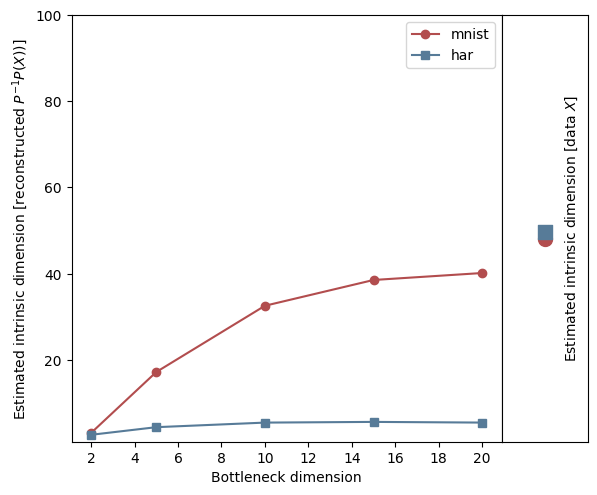

In [9]:
fig = plt.figure(figsize=(6, 5))
gs0 = gridspec.GridSpec(1, 1, figure=fig)

gs00 = gridspec.GridSpecFromSubplotSpec(1, 6, subplot_spec=gs0[0])

ax1 = fig.add_subplot(gs00[0, :-1])
ax2 = fig.add_subplot(gs00[0, -1])
# link the y-axis of ax2 to ax1
ax2.get_shared_y_axes().join(ax2, ax1)
# ax2.set_yticks([])

colors = sns.color_palette("Set1", n_colors=8, desat=.5)
markers = ['o', 's', 'v', 'D', 'P', 'X', 'd', 'h']
for i, dataset in enumerate(df['Dataset'].unique()):
    curdf = df[df['Dataset'] == dataset]
    # sort by bottleneck dim
    curdf = curdf.sort_values(by=['bottleneck_dim'])
    ax1.plot(curdf['bottleneck_dim'], curdf['Esimated ID (reco)'], '-'+markers[i], label=dataset, color=colors[i])
    # ax.plot(curdf['bottleneck_dim'], curdf['Intrinsic Dim (data)'], '-s', label=dataset, color=colors[i])
    print(curdf['Esimated ID (data)'].values)
    ax2.scatter([0], [curdf['Esimated ID (data)'].values[0]], marker=markers[i], label=dataset, color=colors[i], s=100)

# make ax1 occupy 80% of the figure, ax2 occupy 20%
ax2.set_xticks([])
# ytciks to the right

ax1.set_xlabel('Bottleneck dimension')
ax1.set_ylabel('Estimated intrinsic dimension [reconstructed $P^{-1}P(X))$]')
# ax2.yaxis.tick_right()

# dont show ax2 yaxis ticks
ax2.set_yticks([])
# ax2.yaxis.tick_right()
# set ax2 yaxis label at the right side
ax2.set_ylabel('Estimated intrinsic dimension [data $X$]', rotation=90, labelpad=-60)

# set withe space between subplots
plt.subplots_adjust(wspace=0.0)

# ax1 tikcs intager
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
# log scale
# ax1.set_yscale('log')
# ax2.set_yscale('log')
plt.tight_layout()
ax1.legend()
# ax1.grid(axis='y')
# ax2.grid(axis='y')

ax1.set_ylim([1, 100])
ax2.set_ylim([1, 100])
ax2.set_yticklabels([])

# fig.savefig('./figures/IDvsInputkDim.pdf', bbox_inches='tight')
# fig.savefig('../paper/PAPER_intrinsic_dim/figures/IDvsInputkDim.eps', bbox_inches='tight', dpi=300)

NameError: name 'ax' is not defined

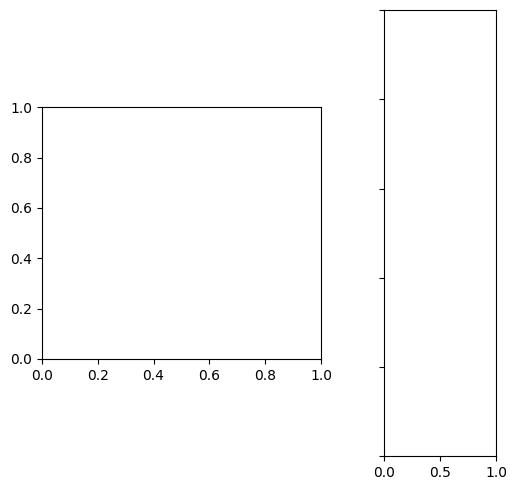

In [47]:
fig, (ax1, ax2) = plt.subplots(figsize=(6, 5), sharey=True, ncols=2)
colors = sns.color_palette("Set1", n_colors=8, desat=.5)
markers = ['o', 's', 'v', 'D', 'P', 'X', 'd', 'h']
for i, dataset in enumerate(df['Dataset'].unique()):
    curdf = df[df['Dataset'] == dataset]
    # sort by bottleneck dim
    # curdf = curdf.sort_values(by=['bottleneck_dim'])
    # ax1.plot(curdf['bottleneck_dim'], curdf['Esimated ID (reco'], '-'+markers[i], label=dataset, color=colors[i])
    # # ax.plot(curdf['bottleneck_dim'], curdf['Intrinsic Dim (data)'], '-s', label=dataset, color=colors[i])
    # ax2.plot([0], curdf['Esimated ID (data)'][0], markers[i], label=dataset, color=colors[i])

# make ax1 occupy 80% of the figure, ax2 occupy 20%
ax1.set_aspect(0.9)
ax2.set_aspect(4)

plt.tight_layout()
ax.legend()